In [1]:
#Import Packages
import random
import datetime
import time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
SEED = 500

1) To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this. 

In [2]:
# generate array of specified length using constant random seed
def generate_array(n):
    array = []
    random.seed(SEED)
    for i in range(0, n):
        array.append(random.randint(0, 10000))
    return array

In [3]:
#creates arrays of n length  
arrays = []
arrays.append(generate_array(512))
arrays.append(generate_array(1024))
arrays.append(generate_array(2048))
arrays.append(generate_array(4096))
arrays.append(generate_array(8192))

In [4]:
x = []
for i in range(0, 10000):
    x.append(random.randint(0,10000))

2) Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.


3)Execute the base search algorithm (binary search) (from the text and github code) for each of array, noting the execution time for each array. With each execution use the maximum value of the random number array as the number for which you are searching.

In [5]:
# Bhargava's binary search
def binary_search(mylist, item):
    start_time = (datetime.datetime.now())
    low = 0
    high =len(mylist) - 1 
    count = 0
    while low <= high:
        mid = (low + high)
        guess = mylist[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
        count+=1
    return None

In [6]:
# linear search
def linear_search(mylist, item):
    for i in range(len(mylist)):
        if mylist[i]==item:
            return i
    return None

In [7]:
# arrays to store sort time, linear search time, and binary search time
sort_times = []
linear_times = []
binary_times = []

for list_item in arrays:
    start_time = (datetime.datetime.now())
    list_item.sort()
    sort_times.append((datetime.datetime.now() - start_time).
                      total_seconds() * 1000) 
       
    linear_start = datetime.datetime.now()
    linear_search(list_item, list_item[-1])
    linear_times.append((datetime.datetime.now() - linear_start).
                      total_seconds() * 1000)
    
    binary_start = datetime.datetime.now()
    binary_search(list_item, list_item[-1])
    binary_times.append((datetime.datetime.now() - binary_start)
                        .total_seconds() * 1000)

In [8]:
array_length = []
for l in range(len(arrays)):
    array_length.append(len(arrays[l]))


4) Now we will compare this to a linear search. Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:
 - length of the random number array
 - sort time
 - linear search time for the sorted array
 - binary search time for the sorted array
 - binary search plus sort times

In [9]:
#Define dataframe with array length, sort time, linear search, and binary search
time_df = {'array length':array_length,
          'sort time': sort_times,
          'linear search': linear_times,
          'binary search': binary_times}
time_df = pd.DataFrame(data=time_df)

In [10]:
# Calculate combined search and sort execution times, and add to dataframe
time_df['total linear'] = time_df['sort time'] + time_df['linear search']
time_df['total binary'] = time_df['sort time'] + time_df['binary search']
time_df

,array length,sort time,linear search,binary search,total linear,total binary
0,512,0.050,0.026,0.003,0.076,0.053
1,1024,0.074,0.051,0.001,0.125,0.075
2,2048,0.155,0.137,0.002,0.292,0.157
3,4096,0.361,0.200,0.001,0.561,0.362
4,8192,0.758,0.412,0.001,1.170,0.759


5) Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for linear and binary search algorithms alone.  Discuss the results.

The execution time for a binary search algorithm remained unchanged throughout execution across the different array lengths. The linear search algorithm increased in execution time as the array length increases. At a length of 512, the execution time for both algorithms are within 0.05 milliseconds of one another. At an array length of 1024, the time increases by a factor of two. This trend remains unchanged as array length increases; at an array length of 8192, execution time has increased to approximately 0.40 milliseconds. The binary search algorithm operates on O(log n)which means as the count of objects increases, the execution time remains the same. With the linear search algorithm, as n increases, the execution time increases. The binary search algorithm becomes faster as n increases. This is seen because the execution time takes longer for the linear search algorithm as n increases. 


Text(0.5, 1.0, 'Fig 1: Execution Time by Search Type')

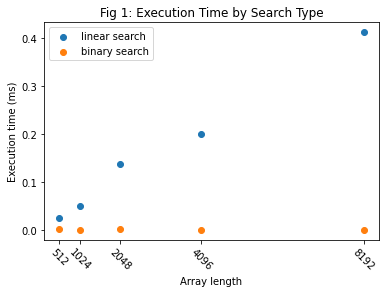

In [11]:
#plot results without sort time
plt.scatter(time_df['array length'], [time_df['linear search']])
plt.scatter(time_df['array length'], [time_df['binary search']])
plt.legend(('linear search', 'binary search'))
plt.xticks(time_df['array length'], rotation=-45)
plt.ylabel('Execution time (ms)')
plt.xlabel('Array length')
plt.title('Fig 1: Execution Time by Search Type')

6) Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.

Figure 2 shows O(n*log n) executing as the sort + linear search and the sort + binary search execution times both increased. A Linear search algorithm can be implemented on an unsorted data set while a binary search algorithm can be executed on a sorted data set. A binary search algorithm becomes faster and is the optimal approach for executing a search. As n increases, the number of operations needed increases with a linear search algorithm. A binary search algorithm executes over half the data until it reaches a solution. So as the number of objects increases, the number of steps increases but the binary search algorithm is able to arrive at a solution with a fraction of the steps.  

Text(0.5, 1.0, 'Fig 2: Execution Time by Search Type (Sort Time Included)')

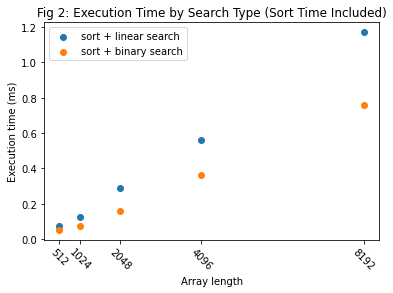

In [12]:
#plot results with sort time
plt.scatter(time_df['array length'], [time_df['total linear']])
plt.scatter(time_df['array length'], [time_df['total binary']])
plt.legend(('sort + linear search',
            'sort + binary search'))
plt.xticks(time_df['array length'], rotation=-45)
plt.ylabel('Execution time (ms)')
plt.xlabel('Array length')
plt.title('Fig 2: Execution Time by Search Type (Sort Time Included)')

EXECUTIVE SUMMARY

Introduction

Search algorithms have a primary objective of locating a search target within a list. As the number of objects within a list increase, the execution time increases which hinders achieving growth. Linear search and binary search algorithms are implemented when attempting to achieve efficiency and scalability. This was an analysis of the execution time of the binary search algorithm and the linear search algorithm across varying array lengths. 

Algorithms

A binary search algorithm starts at the median value of a set and compares it to the targeted value until it locates the value in the search. It continues on the median value as iterations exclude values which were not the target value. If a value is high, the median point is held to the right of the initial search position. If a value is low, the median point is held to the left of the initial search position. This continues until the search target is located or the search area has been exhausted. A linear search algorithm starts at the beginning of a set and moves sequentially from left to right until it locates the target value or until the search area has been exhausted.  

Industry Application

Search algorithms help organizations and customers achieve their results faster and more efficiently. The task of a data engineer is to design, build, and maintain a system which is operational, easy to maintain, and produces value for the organization. As organizations grow, the volume and velocity of data produced will increase. A data engineer has the responsibility to achieve growth at scale. A linear search algorithm is well-suited for unsorted lists while a binary search algorithm is well-suited for sorted lists. At scale, a binary search algorithm is efficient for working with large datasets.  

Methodology

A set of five random data arrays were generated for this analysis as input. The array lengths were 512,1024,2048,4096, and 8192. The arrays were sorted from low to high with the target search objective being to sort through the arrays. For each array, the target search value was located at the end of the executed search. The purpose being to determine the amount of time for each algorithm to execute and locate the target search value. 

Analysis & Results

Figure 1 displays the results generated from a linear search and a binary search. As the array length increased, the linear search algorithm execution time increases as the quantity of objects increases. The binary search algorithm remains constants, this is because the larger the dataset, the number of operations needed to locate the target value increases but not exponentially. Figure 2 displays the results generated a linear search and a binary search, each with the added execution time for sorting through the arrays. At an array length of 2048, the linear search and binary search execution times vary by a factor of two. 

Discussion of Big O Notation

The speed of an algorithm is denoted in Big O notation. It describes the number of steps needed to successfully execute a search to locate the target value. For a binary search algorithm, this is denoted as O(log n). The algorithm works by locating the target value at the median position of a list. Binary search accounts for time logarithmically while linear search accounts for time sequentially. Notation for a linear search is O(n) and for sort, the notation is O(n * log n).

Conclusion

For an organization with the objective of growing its business, it will need to be able to scale it operations. As the business grows, the tasks required will grow in both complexity and process. To remain agile, a binary search algorithm would allow for an organization to deliver results while being aware of its resources. An example would be an organization's hardware systems and the processing limitations of those sytems, implementing the binary search algorithm over the linear search algorithm would be the optimal approach because it would require less resources to produce the same target but not the same results nor the same value. The same results and the same value are not achieved through the linear search algorithm, as the resources required to achieve the same target are above those from the binary search algorithm.  